In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as mx
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap  # For Color

In [21]:
"""
Let's say I have 50 balls in a bag and out of which 25 are blue and 25 are black
I need to pick every ball and need to guess whether it is blue or black based on shape or feel or size without seeing

Let's say I said 30 balls are blue and 20 are black and out of this 20 I correctly predicted 

Precision ---> How much % I actually guessed right means How much I precise in saying blue balls (20/30)

Recall/Sensitivity ---> How much I was able to recall 20/25, So recall is 

Fallout/Prob of false Alarm = 10/25  # You have predicted 10 incorrect as blue when they are black so (wrongly predicted/Black Values).
So there is 40% chances that you predict ball as black when it is blue

So Matrix is like this
[ 20, 10]    [ TP, FP]     
[ 5,  15]    [ FN,  TN]

So let us say --> Blue is +ve and Black is -ve so we predicted 20 correct as blue and 15 corrected as black
So we are having False Blue/False Positive = 10 and False Black/Negative = 5

Correct Blue/Positive ---> True Positive , correct Black/negative ----> True Negative

Precision = TP/Predicted +ve   ,Recall/Sesitivity/TPR(True +ve rate) = TP/Actual +ve

False +ve rate = FP/Actual-ve

So Ultimately as a good guessing you need to be as much precise as you can and you need to recall more so % of False alarm goesdown

1. So If we make a graph saying False alarm on X axis and True positive rate on Y axis and weplt a curve for different probabilities.
Because for different threshold selections we have different TPR,FPR.

Perfect Model ---> FPR ---> 0 implies FP --> 0  and Recall is 1 . So point lies on X axis

So as a result there is a tradeoff b/w FPR and TPR and we can select a prob. where we can cope up with TPR,FPR which will be a business decision

So Area under the curve will give how good your model is. 

2. Both ROC, Precision and recall curve will let you decide the threshold of prob.
"""

In [55]:
# Making a classification Model
df = load_iris()
X = df.data
y = df.target
y[y==2] = 0 # Making Binary classificatio Problem
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [56]:
mx.classification_report(y_train,y_train_pred)

'              precision    recall  f1-score   support\n\n           0       0.75      0.90      0.82        68\n           1       0.71      0.46      0.56        37\n\n    accuracy                           0.74       105\n   macro avg       0.73      0.68      0.69       105\nweighted avg       0.74      0.74      0.73       105\n'

In [108]:
confusion = mx.confusion_matrix(y_train,y_train_pred) # Confusion Matrix
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print(f"True Positive: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

[[61  7]
 [20 17]]
True Positive: 17
True Negatives: 61
False Positives: 7
False Negatives: 20


In [58]:
print(mx.accuracy_score(y_train,y_train_pred))
print(mx.precision_score(y_train,y_train_pred))
print(mx.recall_score(y_train,y_train_pred))
print(mx.f1_score(y_train,y_train_pred))


0.7428571428571429
0.7083333333333334
0.4594594594594595
0.5573770491803279


In [60]:
y_train_prob = lr.predict_proba(X_train)[:,1]

In [67]:
fpr,tpr,thresholds = mx.roc_curve(y_train,y_train_prob,drop_intermediate=False)
auc_score =  mx.roc_auc_score(y_train,y_train_prob)
auc_score

0.8267090620031796

(0.0, 1.05)

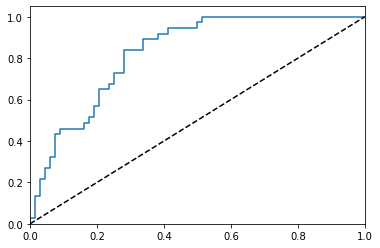

In [70]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

In [93]:
df_prob = pd.DataFrame(y_train.reshape(-1,1),columns=['y_train'])

In [ ]:
df_prob['Prob'] = y_train_prob

In [102]:
for i in range(0,10):
    temp = i/10
    name = "prob_"+str(temp)
    df_prob[name] = df_prob['Prob'].apply(lambda x:1 if x > temp else 0 )
df_prob

,y_train,Prob,prob_0.0,prob_0.1,prob_0.2,prob_0.3,prob_0.4,prob_0.5,prob_0.6,prob_0.7,prob_0.8,prob_0.9
0,1,0.689700,1,1,1,1,1,1,1,0,0,0
1,0,0.505961,1,1,1,1,1,1,0,0,0,0
2,0,0.324850,1,1,1,1,0,0,0,0,0,0
3,1,0.316745,1,1,1,1,0,0,0,0,0,0
4,0,0.086432,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,1,0.415644,1,1,1,1,1,0,0,0,0,0
101,0,0.615053,1,1,1,1,1,1,1,0,0,0
102,0,0.032567,1,0,0,0,0,0,0,0,0,0
103,1,0.565292,1,1,1,1,1,1,0,0,0,0


In [106]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in range(1,10):
    temp = i/10
    name = 'prob_'+str(temp)
    cm = mx.confusion_matrix(df_prob.y_train,df_prob[name])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total  # Accuracy
    speci = cm[0,0]/(cm[0,0]+cm[0,1])  # Precision
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])  # Recall
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df    

,prob,accuracy,sensi,speci
1,1.0,0.447619,1.000000,0.147059
2,2.0,0.638095,1.000000,0.441176
3,3.0,0.714286,0.918919,0.602941
4,4.0,0.742857,0.648649,0.794118
5,5.0,0.742857,0.459459,0.897059
6,6.0,0.714286,0.297297,0.941176
7,7.0,0.676190,0.135135,0.970588
8,8.0,0.657143,0.027027,1.000000
9,9.0,0.647619,0.000000,1.000000


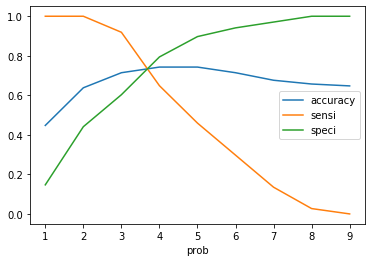

In [107]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()
# Specificity and sensitivity curve with accuracy, Here Cutoff is 0.35 we can take and calculate
# As prob is going zero ---> Recall will increase but precision will be low
# As prob is going to 1  ---> Precision is high but recall is low
# So we need to seethe tradeoff

In [128]:
X_train1 = X_train[:,0:2]
lr = LogisticRegression()
lr.fit(X_train1,y_train)
y_train_pred = lr.predict(X_train1)
mx.confusion_matrix(y_train,y_train_pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


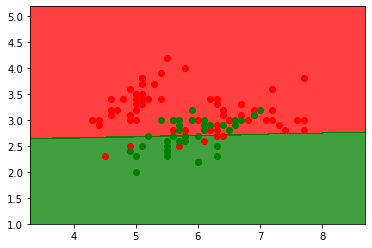

In [164]:
X_set, y_set = X_train1, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), #(8.7-3.3)/0.01 = 540
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)) #(5.2-1.0)/0,01 = 420
# X1 = Rows repetative cols having 540 values 3.3 - 9.7
# X2 = Cols repetative rows having 420 values 1-5.2
# X1,X2 are of sizes 420*540
# lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape) --> 420 * 540
# X1.ravel()( Rowwise  Flattend  1D array so size would be 540*420 = 226800) same with X2.ravel()
#np.array([X1.ravel(), X2.ravel()]).T would be 226800*2 array with first dim as X1.ravel() and second as X2.ravel()
# When this is given to lr.predict it will generate a array of 226800,1 of resulted values
plt.contourf(X1, X2, lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# This is for scatter plot
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

0 0
1 1


array([2.4, 3. , 2.9, 3. , 2.7, 2. , 2.7, 3. , 2.9, 2.2, 3. , 2.3, 2.3,
       2.4, 3. , 3.2, 2.5, 2.7, 2.5, 2.5, 2.9, 2.8, 3.2, 3. , 2.6, 2.7,
       3. , 2.9, 2.6, 3. , 2.4, 3.1, 2.8, 2.3, 2.9, 2.8, 2.6])

array([[3.3 , 1.  ],
       [3.31, 1.  ],
       [3.32, 1.  ],
       ...,
       [8.67, 5.19],
       [8.68, 5.19],
       [8.69, 5.19]])